## Module 3: Modeling Events using Antimony, Tellurium and the (S)ystems (B)iology (M)arkdown (L)anguage (SBML).

Now that we have the skills to execute python commands, the basic syntax, and an ability to install packages, lets begin to learn some modeling basics. Antimony and Tellurium are useful tools created by the Suaro Lab at the University of Washington for mechanistic modeling. 

In this module, you will learn how to perform kinetic modeling of biological systems using Antimony and Tellurium. Antimony is a human-readable modeling language that allows you to describe biochemical reactions, while Tellurium is a Python-based environment for running and analyzing these models. By the end of this module, you will be able to:
- Write kinetic models using Antimony.
- Simulate and analyze models using Tellurium.
- Interpret the results of simulations.

---

## Section 1: Understanding Kinetic Modeling

### 1.1 What is Kinetic Modeling?
Kinetic modeling is a mathematical approach used to describe the dynamic behavior of biochemical systems. It involves defining the rates of chemical reactions and simulating how the concentrations of species change over time.

### 1.2 Why Use Antimony and Tellurium?
Antimony allows you to create models in a simple, human-readable format, while Tellurium provides a powerful simulation environment with built-in tools for analysis and visualization.

---


## Section 2: Introduction to Antimony

### 2.1 Antimony Syntax
Antimony uses a straightforward syntax to define species, reactions, and parameters. Here's a basic example of an irreversible reaction where species `S1` converts to `S2` with a rate constant `k1`:

```antimony
S1 -> S2; k1*S1
k1 = 0.1
S1 = 10
S2 = 0
```

### 2.2 Creating a Simple Model:

Please install the following package, then restart your jupyter notebook for the change to take effect.

In [1]:
# !pip install tellurium

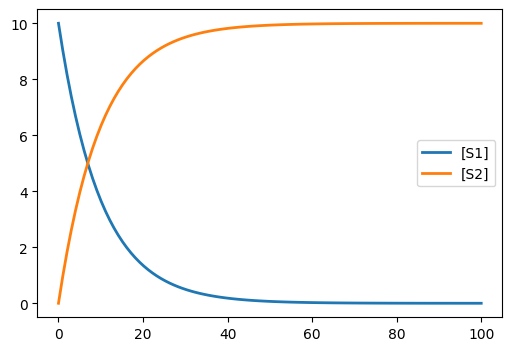

In [2]:
import tellurium as te

# Define the model using Antimony
model = """
model simple_reaction
  S1 -> S2; k1*S1
  k1 = 0.1
  S1 = 10
  S2 = 0
end
"""

# Load the model in Tellurium
r = te.loada(model)

# Simulate the model over 100 time units
result = r.simulate(0, 100, 100)

# Plot the results
r.plot(result)

### 2.3 Exercises: Building Your First Model
- **Exercise 1:** Modify the reaction to include a reverse reaction where `S2` converts back to `S1` with rate constant `k2`.
- **Exercise 2:** Add a second reaction where `S2` converts to a new species `S3` and simulate the system.

---


## Section 3: Advanced Modeling with Antimony

### 3.1 Modeling Enzyme Kinetics
Enzyme kinetics can be modeled using Michaelis-Menten kinetics. Here's an example where an enzyme `E` catalyzes the conversion of substrate `S` to product `P`:

```antimony
model enzyme_kinetics
  S + E -> C; k1*S*E
  C -> E + P; k2*C
  C -> S + E; k3*C
  S = 10
  E = 1
  P = 0
  C = 0
  k1 = 0.1
  k2 = 0.05
  k3 = 0.01
end
```

### 3.2 Exploring Parameter Sensitivity
Parameter sensitivity analysis helps you understand how changes in parameters affect the system's behavior.

In [3]:
# Perform a parameter scan for k1
r.resetToOrigin()
r.k1 = [0.05, 0.1, 0.2]
scan_results = r.scan('k1', [0.05, 0.1, 0.2], r.simulate, 0, 100, 100)
r.plot(scan_results)

TypeError: in method 'ExecutableModel___setitem__', argument 3 of type 'double'


## Section 4: Simulating and Analyzing Models with Tellurium

### 4.1 Time-Course Simulations
Tellurium allows you to perform time-course simulations to see how the system evolves over time.


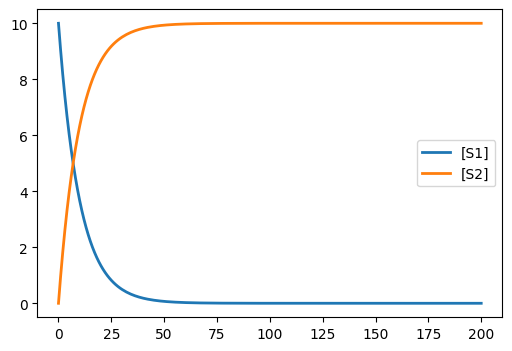

In [4]:
# Simulate the model
result = r.simulate(0, 200, 200)
r.plot(result)


### 4.2 Steady-State Analysis
Steady-state analysis helps you find the equilibrium concentrations of species.


In [5]:
steady_state = r.steadyState()
print("Steady-state concentrations:", steady_state)

Steady-state concentrations: 6.617444900424222e-25



---


## Section 5: Case Studies

### 5.1 Modeling Gene Regulatory Networks
Gene regulatory networks can be modeled to understand how genes interact to control cellular processes.

```antimony
model gene_regulation
  // Example of a simple gene regulatory network
  G + R -> GR; k1*G*R
  GR -> G + R; k2*GR
  GR -> P + G + R; k3*GR
  P -> ; k4*P
  
  G = 1
  R = 1
  P = 0
  GR = 0
  k1 = 0.1
  k2 = 0.1
  k3 = 0.05
  k4 = 0.01
end
```

### 5.2 Metabolic Pathway Modeling
Metabolic pathways describe the flow of metabolites through enzymatic reactions. You can use Antimony to model complex pathways and study their dynamics.

```antimony
model metabolic_pathway
  A -> B; v1*A
  B -> C; v2*B
  C -> ; v3*C
  
  A = 10
  B = 0
  C = 0
  v1 = 0.1
  v2 = 0.05
  v3 = 0.02
end
```

---


## Conclusion
By completing this module, you have learned how to build, simulate, and analyze kinetic models using Antimony and Tellurium. These tools are powerful for exploring the dynamic behavior of biochemical systems and can be applied to a wide range of biological modeling problems. Continue experimenting with your own models and explore the rich features offered by Tellurium for deeper analysis.

## Further Reading and Resources
- **Tellurium Documentation:** [Tellurium Docs](http://tellurium.analogmachine.org/documentation/)
- **Antimony Documentation:** [Antimony Docs](https://antimony.readthedocs.io/en/latest/)
- **SBML (Systems Biology Markup Language):** Learn about the standard format for exchanging biological models.
- **BioModels Database:** Explore a repository of published, peer-reviewed models.

---

## Acknowledgments
This module is inspired by the work of the broader systems biology community and is designed to provide a practical introduction to kinetic modeling using Antimony and Tellurium.
```

---